In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score
import scipy.io
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("../data/data.csv")

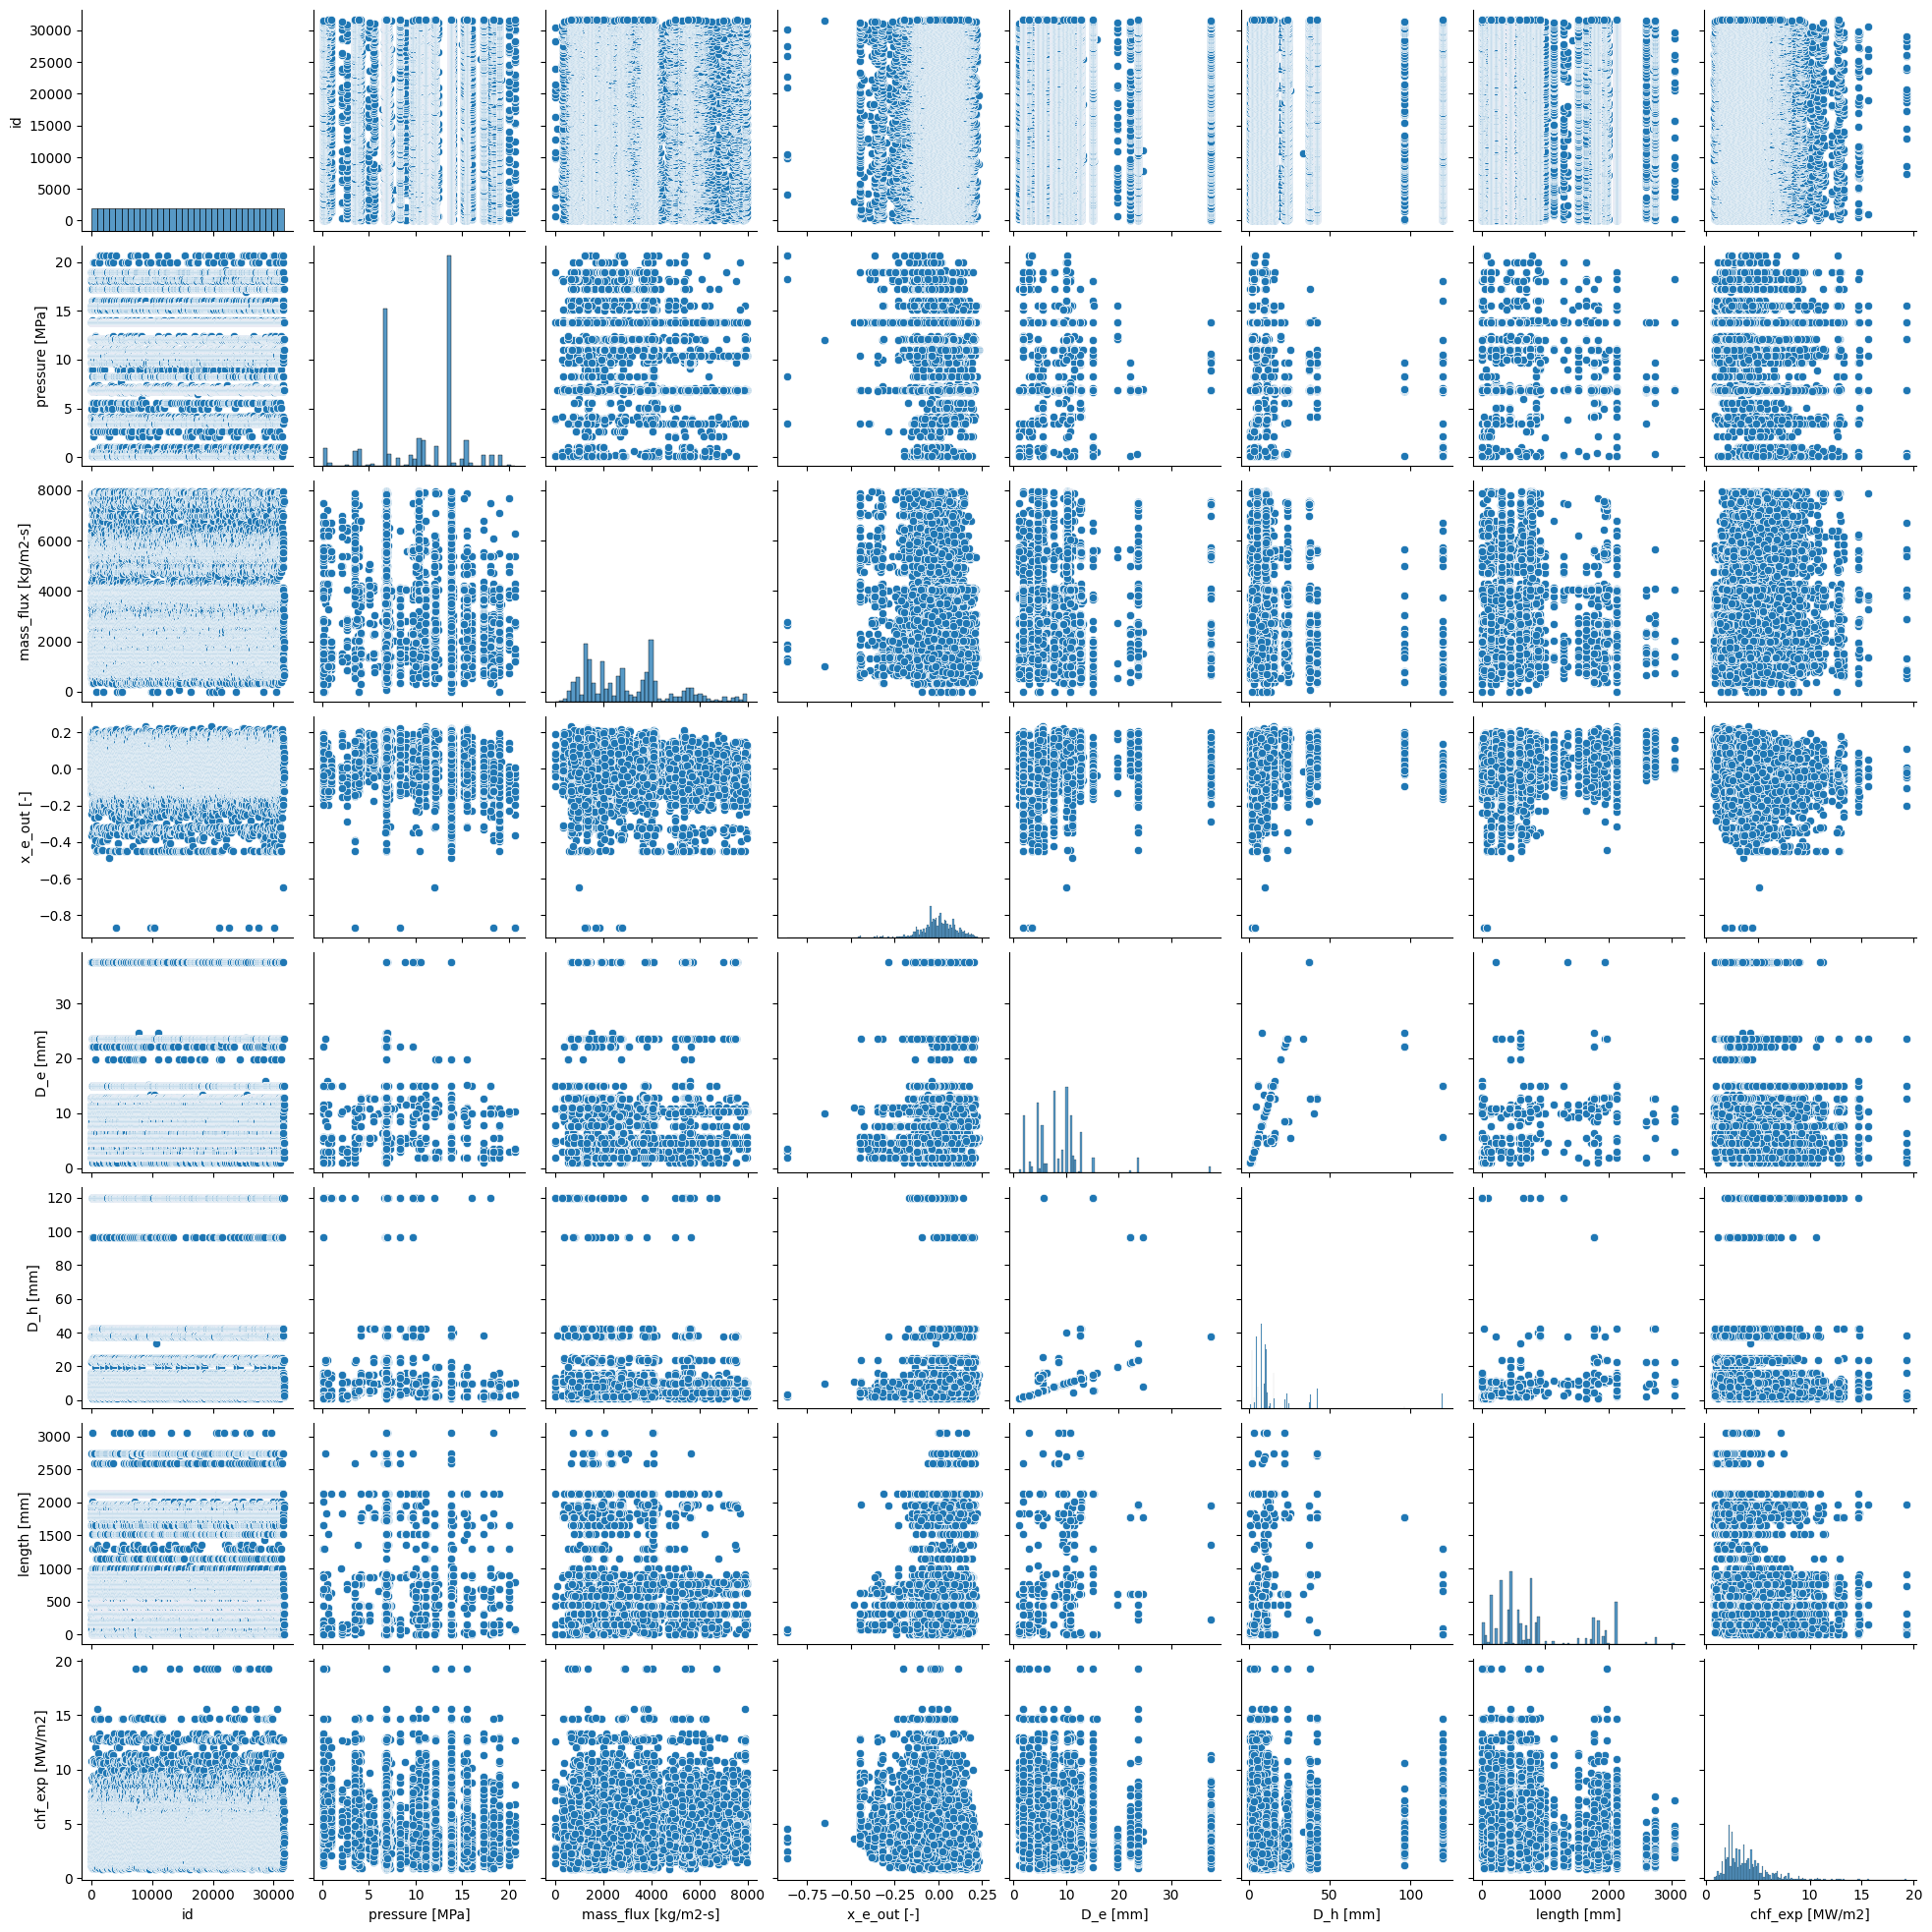

In [3]:
sns.pairplot(df)

In [3]:
# Obtén la columna "x_e_out"
x_e_out = df['x_e_out [-]']

# Elimina la columna "x_e_out" del DataFrame
df = df.drop('x_e_out [-]', axis=1)

# Agrega la columna "x_e_out" al final del DataFrame
df['x_e_out [-]'] = x_e_out

In [4]:
# Definir un diccionario de mapeo para los valores conocidos de "author" y "geometry"
mapeo_geometry = {
    'Thompson': 'tube',
    'Peskov': 'tube',
    'Weatherhead': 'tube',
    'Inasaka': 'tube',
    'Williams': 'tube',
    'Beus': 'annulus',
    'Janssen': 'annulus',
    'Mortimore': 'annulus',
    'Richenderfer': 'plate',
    'Kossolapov': 'plate'
}

# Rellenar los valores nulos en "geometry" utilizando el diccionario de mapeo
df['geometry'] = df['geometry'].fillna(df['author'].map(mapeo_geometry))

In [5]:
# Llenar los nulos en "length [mm]" con 10.0 cuando la columna "geometry" es "plate"
df.loc[df['geometry'] == 'plate', 'length [mm]'] = df.loc[df['geometry'] == 'plate', 'length [mm]'].fillna(10.0)

# Llenar los nulos en "D_e [mm]" con 15.0 cuando la columna "geometry" es "plate"
df.loc[df['geometry'] == 'plate', 'D_e [mm]'] = df.loc[df['geometry'] == 'plate', 'D_e [mm]'].fillna(15.0)

# Llenar los nulos en "D_h [mm]" con 120.0 cuando la columna "geometry" es "plate"
df.loc[df['geometry'] == 'plate', 'D_h [mm]'] = df.loc[df['geometry'] == 'plate', 'D_h [mm]'].fillna(120.0)


In [6]:
# Filtrar las filas con valores nulos en la columna 'x_e_out'
df_nulos = df[df['x_e_out [-]'].isnull()]

# Crear un nuevo DataFrame con las filas que contienen valores nulos en 'x_e_out'
nuevos_datos = df_nulos.copy()

In [7]:
df = df.dropna(subset=['x_e_out [-]'])

# Imprimir el DataFrame original sin las filas con valores nulos

In [8]:
# Crear una lista de tuplas con los valores de 'geometry' y 'D_h [mm]' correspondientes
valores_geometry = [('annulus', 15.2), ('annulus', 42.3), ('annulus', 38.1), ('annulus', 15.9), ('annulus', 22.3),
                    ('annulus', 24.6), ('annulus', 13.3), ('annulus', 96.3), ('annulus', 11.3), ('plate', 120.0), ('tube', 10.3), ('tube', 10.8),
                    ('tube', 1.9), ('tube', 4.7), ('tube', 7.7), ('tube', 7.8), ('tube', 10.0), ('tube', 9.5),
                    ('tube', 11.1), ('tube', 11.5), ('tube', 23.6), ('tube', 4.6), ('tube', 5.6), ('tube', 3.0),
                    ('tube', 5.7), ('tube', 12.8), ('tube', 3.6), ('tube', 37.5), ('tube', 9.3), ('tube', 1.0), ('tube', 12.4), ('tube', 8.0)]

# Convertir la lista en un diccionario para mapear los valores de 'D_h [mm]' a 'geometry'
geometry_dict = {key: value for value, key in valores_geometry}

# Actualizar los valores en 'geometry' del DataFrame original basado en 'D_h [mm]'
df['geometry'] = df['D_h [mm]'].map(geometry_dict).fillna(df['geometry'])

In [9]:
# Crear una lista de tuplas con los valores de 'geometry' y 'D_e [mm]' correspondientes
valores_geometry1 = [('annulus', 5.6), ('annulus', 12.7), ('annulus', 8.5), ('annulus', 6.4), ('annulus', 5.0),
                    ('annulus', 22.2), ('plate', 15.0), ('tube', 10.3), ('tube', 1.9), ('tube', 10.8),
                    ('tube', 4.7), ('tube', 7.7), ('tube', 7.8), ('tube', 10.0), ('tube', 9.5),
                    ('tube', 11.1), ('tube', 23.6), ('tube', 4.6), ('tube', 11.5), ('tube', 3.0),
                    ('tube', 5.7), ('tube', 12.8), ('tube', 3.6), ('tube', 37.5), ('tube', 9.3), ('tube', 10.4), ('tube', 19.8)]

# Convertir la lista en un diccionario para mapear los valores de 'D_e [mm]' a 'geometry'
geometry_dict1 = {key: value for value, key in valores_geometry1}

# Actualizar los valores en 'geometry' del DataFrame original basado en 'D_e [mm]'
df['geometry'] = df['D_e [mm]'].map(geometry_dict1).fillna(df['geometry'])


In [10]:
# Crear una lista de tuplas con los valores de 'geometry' y 'pressure [MPa]' correspondientes
valores_geometry2 = [('annulus', 6.89), ('annulus', 13.79), ('annulus', 15.51), ('annulus', 11.03), ('annulus', 6.92),
                    ('annulus', 8.27), ('annulus', 9.68), ('plate', 0.1), ('tube', 13.79), ('tube', 6.89),
                    ('tube', 10.34), ('tube', 3.45), ('tube', 15.51), ('tube', 12.07), ('tube', 17.24),
                    ('tube', 6.86), ('tube', 18.96), ('tube', 11.03), ('tube', 6.79), ('tube', 12.0),
                    ('tube', 18.27), ('tube', 15.17), ('tube', 3.86), ('tube', 10.0), ('tube', 6.83),
                    ('tube', 0.1), ('tube', 6.72), ('tube', 6.93), ('tube', 16.0)]

# Convertir la lista en un diccionario para mapear los valores de 'pressure [MPa]' a 'geometry'
geometry_dict2 = {key: value for value, key in valores_geometry2}

# Actualizar los valores en 'geometry' del DataFrame original basado en 'pressure [MPa]'
df['geometry'] = df['pressure [MPa]'].map(geometry_dict2).fillna(df['geometry'])

In [8]:
df['geometry'] = df['geometry'].fillna('tube')

In [12]:
# Crear una lista de tuplas con los valores de 'geometry' y 'D_h [mm]' correspondientes
valores_geometry = [('annulus', 15.2), ('annulus', 42.3), ('annulus', 38.1), ('annulus', 15.9), ('annulus', 22.3),
                    ('annulus', 24.6), ('annulus', 13.3), ('annulus', 96.3), ('annulus', 11.3), ('plate', 120.0), ('tube', 10.3), ('tube', 10.8),
                    ('tube', 1.9), ('tube', 4.7), ('tube', 7.7), ('tube', 7.8), ('tube', 10.0), ('tube', 9.5),
                    ('tube', 11.1), ('tube', 11.5), ('tube', 23.6), ('tube', 4.6), ('tube', 5.6), ('tube', 3.0),
                    ('tube', 5.7), ('tube', 12.8), ('tube', 3.6), ('tube', 37.5), ('tube', 9.3), ('tube', 1.0), ('tube', 12.4), ('tube', 8.0)]

# Convertir la lista en un diccionario para mapear los valores de 'D_h [mm]' a 'geometry'
geometry_dict = {key: value for value, key in valores_geometry}

# Actualizar los valores en 'geometry' del DataFrame original basado en 'D_h [mm]'
nuevos_datos['geometry'] = nuevos_datos['D_h [mm]'].map(geometry_dict).fillna(nuevos_datos['geometry'])

# Crear una lista de tuplas con los valores de 'geometry' y 'D_e [mm]' correspondientes
valores_geometry1 = [('annulus', 5.6), ('annulus', 12.7), ('annulus', 8.5), ('annulus', 6.4), ('annulus', 5.0),
                    ('annulus', 22.2), ('plate', 15.0), ('tube', 10.3), ('tube', 1.9), ('tube', 10.8),
                    ('tube', 4.7), ('tube', 7.7), ('tube', 7.8), ('tube', 10.0), ('tube', 9.5),
                    ('tube', 11.1), ('tube', 23.6), ('tube', 4.6), ('tube', 11.5), ('tube', 3.0),
                    ('tube', 5.7), ('tube', 12.8), ('tube', 3.6), ('tube', 37.5), ('tube', 9.3), ('tube', 10.4), ('tube', 19.8)]

# Convertir la lista en un diccionario para mapear los valores de 'D_e [mm]' a 'geometry'
geometry_dict1 = {key: value for value, key in valores_geometry1}

# Actualizar los valores en 'geometry' del DataFrame original basado en 'D_e [mm]'
nuevos_datos['geometry'] = nuevos_datos['D_e [mm]'].map(geometry_dict1).fillna(nuevos_datos['geometry'])

# Crear una lista de tuplas con los valores de 'geometry' y 'D_e [mm]' correspondientes
valores_geometry1 = [('annulus', 5.6), ('annulus', 12.7), ('annulus', 8.5), ('annulus', 6.4), ('annulus', 5.0),
                    ('annulus', 22.2), ('plate', 15.0), ('tube', 10.3), ('tube', 1.9), ('tube', 10.8),
                    ('tube', 4.7), ('tube', 7.7), ('tube', 7.8), ('tube', 10.0), ('tube', 9.5),
                    ('tube', 11.1), ('tube', 23.6), ('tube', 4.6), ('tube', 11.5), ('tube', 3.0),
                    ('tube', 5.7), ('tube', 12.8), ('tube', 3.6), ('tube', 37.5), ('tube', 9.3), ('tube', 10.4), ('tube', 19.8)]

# Convertir la lista en un diccionario para mapear los valores de 'D_e [mm]' a 'geometry'
geometry_dict1 = {key: value for value, key in valores_geometry1}

# Actualizar los valores en 'geometry' del DataFrame original basado en 'D_e [mm]'
nuevos_datos['geometry'] = nuevos_datos['D_e [mm]'].map(geometry_dict1).fillna(nuevos_datos['geometry'])

nuevos_datos['geometry'] = nuevos_datos['geometry'].fillna('tube')

In [14]:
nuevos_datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10415 entries, 4 to 31642
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10415 non-null  int64  
 1   author               8794 non-null   object 
 2   geometry             10415 non-null  object 
 3   pressure [MPa]       8949 non-null   float64
 4   mass_flux [kg/m2-s]  8851 non-null   float64
 5   D_e [mm]             8600 non-null   float64
 6   D_h [mm]             8987 non-null   float64
 7   length [mm]          8843 non-null   float64
 8   chf_exp [MW/m2]      10415 non-null  float64
 9   x_e_out [-]          0 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 895.0+ KB


In [9]:
df.loc[df['geometry'] == 'tube', 'author'] = df.loc[df['geometry'] == 'tube', 'author'].fillna('Thompson')
df.loc[df['geometry'] == 'plate', 'author'] = df.loc[df['geometry'] == 'plate', 'author'].fillna('Richenderfer')
df.loc[df['geometry'] == 'annulus', 'author'] = df.loc[df['geometry'] == 'annulus', 'author'].fillna('Beus')

In [10]:
nuevos_datos.loc[nuevos_datos['geometry'] == 'tube', 'author'] = nuevos_datos.loc[nuevos_datos['geometry'] == 'tube', 'author'].fillna('Thompson')
nuevos_datos.loc[nuevos_datos['geometry'] == 'plate', 'author'] = nuevos_datos.loc[nuevos_datos['geometry'] == 'plate', 'author'].fillna('Richenderfer')
nuevos_datos.loc[nuevos_datos['geometry'] == 'annulus', 'author'] = nuevos_datos.loc[nuevos_datos['geometry'] == 'annulus', 'author'].fillna('Beus')

In [11]:
# Aplicar codificación one-hot a la columna "author"
df = pd.get_dummies(df, columns=['author'], prefix=['author'])

# Aplicar codificación one-hot a la columna "geometry"
df = pd.get_dummies(df, columns=['geometry'], prefix=['geometry'])


In [12]:
# Aplicar codificación one-hot a la columna "author"
nuevos_datos = pd.get_dummies(nuevos_datos, columns=['author'], prefix=['author'])

# Aplicar codificación one-hot a la columna "geometry"
nuevos_datos = pd.get_dummies(nuevos_datos, columns=['geometry'], prefix=['geometry'])

In [17]:
# Crear una lista de tuplas con los valores de 'D_h [mm]' correspondientes
valores_dh = [(10.3, 10.3), (10.8, 10.8), (1.9, 1.9), (4.7, 4.7), (7.7, 7.7), (5.6, 15.2), (7.8, 7.8), (10.0, 10.0), (15.0, 120.0), (9.5, 9.5), (12.7, 42.3),
              (11.1, 11.1), (11.5, 11.5), (12.7, 38.1), (23.6, 23.6), (4.6, 4.6), (3.0, 3.0), (6.4, 15.9), (5.7, 5.7), (8.5, 22.3), (12.8, 12.8), (3.6, 3.6),
              (37.5, 37.5), (8.5, 24.6), (5.0, 13.3), (9.3, 9.3), (1.0, 1.0), (22.2, 96.3), (12.4, 12.4), (4.6, 11.3), (8.0, 8.0), (19.8, 19.8), (1.1, 1.1),
              (23.5, 23.5), (1.7, 1.7), (10.4, 10.4), (10.5, 10.5), (10.1, 10.1)]

# Crear un diccionario para mapear los valores de 'D_h [mm]' a 'D_e [mm]' y viceversa
dh_dict = {key: value for value, key in valores_dh}

# Actualizar los valores en 'D_e [mm]' basados en 'D_h [mm]'
nuevos_datos['D_e [mm]'] = nuevos_datos['D_h [mm]'].map(dh_dict).fillna(nuevos_datos['D_e [mm]'])

# Actualizar los valores en 'D_h [mm]' basados en 'D_e [mm]'
nuevos_datos['D_h [mm]'] = nuevos_datos['D_e [mm]'].map(dh_dict).fillna(nuevos_datos['D_h [mm]'])

In [18]:
# Crear una lista de tuplas con los valores de 'D_e [mm]' y 'D_h [mm]' correspondientes
valores_de = [(10.3, 10.3), (10.8, 10.8), (1.9, 1.9), (4.7, 4.7), (7.7, 7.7), (5.6, 15.2), (7.8, 7.8), (10.0, 10.0), (15.0, 120.0), (9.5, 9.5), (12.7, 42.3),
              (11.1, 11.1), (11.5, 11.5), (12.7, 38.1), (23.6, 23.6), (4.6, 4.6), (3.0, 3.0), (6.4, 15.9), (5.7, 5.7), (8.5, 22.3), (12.8, 12.8), (3.6, 3.6),
              (37.5, 37.5), (8.5, 24.6), (5.0, 13.3), (9.3, 9.3), (1.0, 1.0), (22.2, 96.3), (12.4, 12.4), (4.6, 11.3), (8.0, 8.0), (19.8, 19.8), (1.1, 1.1),
              (23.5, 23.5), (1.7, 1.7), (10.4, 10.4), (10.5, 10.5), (10.1, 10.1)]

# Convertir la lista de tuplas en un diccionario para mapear los valores de 'D_e [mm]' a 'D_h [mm]'
de_dict = {key: value for key, value in valores_de}

# Iterar sobre las filas del DataFrame para imputar los valores nulos en 'D_h [mm]' y 'D_e [mm]'
for index, row in nuevos_datos.iterrows():
    de = row['D_e [mm]']
    dh = row['D_h [mm]']
    
    # Verificar si el valor en 'D_h [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(dh) and de in de_dict:
        nuevos_datos.at[index, 'D_h [mm]'] = de_dict[de]
    
    # Verificar si el valor en 'D_e [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(de) and dh in de_dict:
        nuevos_datos.at[index, 'D_e [mm]'] = de_dict[dh]

# Imprimir el DataFrame actualizado con los valores imputados
print(nuevos_datos)

          id  pressure [MPa]  mass_flux [kg/m2-s]  D_e [mm]  D_h [mm]  \
4          4           13.79                686.0      11.1      11.1   
7          7           18.00                750.0      10.0      10.0   
10        10             NaN                  NaN       1.9       1.9   
12        12            6.89               7500.0      12.8      12.8   
23        23           15.51               1355.0       5.6      15.2   
...      ...             ...                  ...       ...       ...   
31633  31633           11.03                  NaN      11.5      11.5   
31634  31634            1.01               2000.0      15.0     120.0   
31637  31637           13.79                688.0      11.1      11.1   
31640  31640           13.79                  NaN       4.7       4.7   
31642  31642            6.89               3825.0      23.6      23.6   

       length [mm]  chf_exp [MW/m2]  x_e_out [-]  author_Beus  author_Inasaka  \
4            457.0              2.8       

In [19]:
# Crear el DataFrame con los valores proporcionados
data = {'D_e [mm]': [7.7, 10.3, 4.7, 1.9, 7.8, 10.8, 5.6, 10.8, 9.5, 1.9, 15.0, 12.7, 10.3, 5.7],
        'D_h [mm]': [7.7, 10.3, 4.7, 1.9, 7.8, 10.8, 15.2, 10.8, 9.5, 1.9, 120.0, 42.3, 10.3, 5.7],
        'length [mm]': [457.0, 762.0, 318.0, 152.0, 591.0, 432.0, 2134.0, 864.0, 1836.0, 696.0, 10.0, 1778.0, 794.0, 625.0]}


# Crear un diccionario con los valores de 'D_e [mm]' y 'D_h [mm]' correspondientes
de_dict = {457.0: (7.7, 7.7), 762.0: (10.3, 10.3), 318.0: (4.7, 4.7), 152.0: (1.9, 1.9), 591.0: (7.8, 7.8),
           432.0: (10.8, 10.8), 2134.0: (5.6, 15.2), 864.0: (10.8, 10.8), 1836.0: (9.5, 9.5), 696.0: (1.9, 1.9),
           10.0: (15.0, 120.0), 1778.0: (12.7, 42.3), 794.0: (10.3, 10.3), 625.0: (5.7, 5.7)}

# Iterar sobre las filas del DataFrame para imputar los valores nulos en 'D_h [mm]' y 'D_e [mm]'
for index, row in nuevos_datos.iterrows():
    de = row['D_e [mm]']
    dh = row['D_h [mm]']
    length = row['length [mm]']
    
    # Verificar si el valor en 'D_h [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(dh) and de in de_dict:
        nuevos_datos.at[index, 'D_h [mm]'] = de_dict[de][1]
    
    # Verificar si el valor en 'D_e [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(de) and dh in de_dict:
        nuevos_datos.at[index, 'D_e [mm]'] = de_dict[dh][0]
        
    # Verificar si el valor en 'length [mm]' tiene una correspondencia en el diccionario
    if length in de_dict:
        de, dh = de_dict[length]
        nuevos_datos.at[index, 'D_e [mm]'] = de
        nuevos_datos.at[index, 'D_h [mm]'] = dh



In [20]:
# Crear el DataFrame con los valores proporcionados
data = {'D_e [mm]': [7.7, 10.3, 10.3, 1.9, 10.8, 10.8, 1.9, 1.9, 1.9, 5.6, 10.3, 10.0],
        'D_h [mm]': [7.7, 10.3, 10.3, 1.9, 10.8, 10.8, 1.9, 1.9, 1.9, 15.2, 10.3, 10.0],
        'pressure [MPa]': [13.7900, 6.8900, 10.3400, 15.5100, 6.8600, 6.7900, 12.0700, 17.2400, 18.9600, 11.0300, 3.4500, 12.0000]}

# Crear un diccionario con los valores de 'D_e [mm]' y 'D_h [mm]' correspondientes
de_dict = {13.7900: (7.7, 7.7), 6.8900: (10.3, 10.3), 10.3400: (10.3, 10.3), 15.5100: (1.9, 1.9), 17.2400: (1.9, 1.9),
           6.8600: (10.8, 10.8), 11.0300: (5.6, 15.2), 6.7900: (10.8, 10.8), 12.0700: (1.9, 1.9),
           12.0000: (10.0, 10.0), 3.4500: (10.3, 10.3), 18.9600: (1.9, 1.9)}

# Iterar sobre las filas del DataFrame para imputar los valores nulos en 'D_h [mm]' y 'D_e [mm]'
for index, row in nuevos_datos.iterrows():
    de = row['D_e [mm]']
    dh = row['D_h [mm]']
    length = row['pressure [MPa]']
    
    # Verificar si el valor en 'D_h [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(dh) and de in de_dict:
        nuevos_datos.at[index, 'D_h [mm]'] = de_dict[de][1]
    
    # Verificar si el valor en 'D_e [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(de) and dh in de_dict:
        nuevos_datos.at[index, 'D_e [mm]'] = de_dict[dh][0]
        
    # Verificar si el valor en 'length [mm]' tiene una correspondencia en el diccionario
    if length in de_dict:
        de, dh = de_dict[length]
        nuevos_datos.at[index, 'D_e [mm]'] = de
        nuevos_datos.at[index, 'D_h [mm]'] = dh



In [19]:
# Calcular la media de las columnas 'D_e [mm]' y 'D_h [mm]'
media_de = nuevos_datos['D_e [mm]'].mean()
media_dh = nuevos_datos['D_h [mm]'].mean()

# Rellenar los valores nulos con la media en las columnas 'D_e [mm]' y 'D_h [mm]'
nuevos_datos['D_e [mm]'].fillna(media_de, inplace=True)
nuevos_datos['D_h [mm]'].fillna(media_dh, inplace=True)

In [24]:
nuevos_datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10415 entries, 4 to 31642
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10415 non-null  int64  
 1   pressure [MPa]       8949 non-null   float64
 2   mass_flux [kg/m2-s]  8851 non-null   float64
 3   D_e [mm]             10415 non-null  float64
 4   D_h [mm]             10415 non-null  float64
 5   length [mm]          8843 non-null   float64
 6   chf_exp [MW/m2]      10415 non-null  float64
 7   x_e_out [-]          0 non-null      float64
 8   author_Beus          10415 non-null  uint8  
 9   author_Inasaka       10415 non-null  uint8  
 10  author_Janssen       10415 non-null  uint8  
 11  author_Kossolapov    10415 non-null  uint8  
 12  author_Mortimore     10415 non-null  uint8  
 13  author_Peskov        10415 non-null  uint8  
 14  author_Richenderfer  10415 non-null  uint8  
 15  author_Thompson      10415 non-null 

In [13]:
# Dividir en X e y
X = df.drop(['x_e_out [-]', 'id'], axis=1)  # Todas las columnas excepto 'x_e_out'
y = df['x_e_out [-]']  # Solo la columna 'x_e_out'

In [25]:

# Crear una lista de tuplas con los valores de 'D_e [mm]' y 'D_h [mm]' correspondientes
valores_de = [(10.3, 10.3), (10.8, 10.8), (1.9, 1.9), (4.7, 4.7), (7.7, 7.7), (5.6, 15.2), (7.8, 7.8), (10.0, 10.0), (15.0, 120.0), (9.5, 9.5), (12.7, 42.3),
              (11.1, 11.1), (11.5, 11.5), (12.7, 38.1), (23.6, 23.6), (4.6, 4.6), (3.0, 3.0), (6.4, 15.9), (5.7, 5.7), (8.5, 22.3), (12.8, 12.8), (3.6, 3.6),
              (37.5, 37.5), (8.5, 24.6), (5.0, 13.3), (9.3, 9.3), (1.0, 1.0), (22.2, 96.3), (12.4, 12.4), (4.6, 11.3), (8.0, 8.0), (19.8, 19.8), (1.1, 1.1),
              (23.5, 23.5), (1.7, 1.7), (10.4, 10.4), (10.5, 10.5), (10.1, 10.1)]

# Convertir la lista de tuplas en un diccionario para mapear los valores de 'D_e [mm]' a 'D_h [mm]'
de_dict = {key: value for key, value in valores_de}

# Iterar sobre las filas del DataFrame para imputar los valores nulos en 'D_h [mm]' y 'D_e [mm]'
for index, row in X.iterrows():
    de = row['D_e [mm]']
    dh = row['D_h [mm]']
    
    # Verificar si el valor en 'D_h [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(dh) and de in de_dict:
        X.at[index, 'D_h [mm]'] = de_dict[de]
    
    # Verificar si el valor en 'D_e [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(de) and dh in de_dict:
        X.at[index, 'D_e [mm]'] = de_dict[dh]

# Imprimir el DataFrame actualizado con los valores imputados
print(X)

       pressure [MPa]  mass_flux [kg/m2-s]  D_e [mm]  D_h [mm]  length [mm]  \
0                7.00               3770.0      10.8      10.8        432.0   
1                 NaN               6049.0      10.3      10.3        762.0   
2               13.79               2034.0       7.7       7.7        457.0   
3               13.79               3679.0       5.6      15.2       2134.0   
5               17.24               3648.0       1.9       1.9        696.0   
...               ...                  ...       ...       ...          ...   
31636           12.07                  NaN       1.9       1.9        152.0   
31638             NaN               3648.0       4.7       4.7        318.0   
31639             NaN               1736.0       7.8       7.8        591.0   
31641           18.27                658.0       3.0       3.0        150.0   
31643            6.89               7568.0      12.8      12.8       1930.0   

       chf_exp [MW/m2]  author_Beus  author_Inasaka

In [26]:
# Crear el DataFrame con los valores proporcionados
data = {'D_e [mm]': [7.7, 10.3, 4.7, 1.9, 7.8, 10.8, 5.6, 10.8, 9.5, 1.9, 15.0, 12.7, 10.3, 5.7],
        'D_h [mm]': [7.7, 10.3, 4.7, 1.9, 7.8, 10.8, 15.2, 10.8, 9.5, 1.9, 120.0, 42.3, 10.3, 5.7],
        'length [mm]': [457.0, 762.0, 318.0, 152.0, 591.0, 432.0, 2134.0, 864.0, 1836.0, 696.0, 10.0, 1778.0, 794.0, 625.0]}

# Crear un diccionario con los valores de 'D_e [mm]' y 'D_h [mm]' correspondientes
de_dict = {457.0: (7.7, 7.7), 762.0: (10.3, 10.3), 318.0: (4.7, 4.7), 152.0: (1.9, 1.9), 591.0: (7.8, 7.8),
           432.0: (10.8, 10.8), 2134.0: (5.6, 15.2), 864.0: (10.8, 10.8), 1836.0: (9.5, 9.5), 696.0: (1.9, 1.9),
           10.0: (15.0, 120.0), 1778.0: (12.7, 42.3), 794.0: (10.3, 10.3), 625.0: (5.7, 5.7)}

# Iterar sobre las filas del DataFrame para imputar los valores nulos en 'D_h [mm]' y 'D_e [mm]'
for index, row in X.iterrows():
    de = row['D_e [mm]']
    dh = row['D_h [mm]']
    length = row['length [mm]']
    
    # Verificar si el valor en 'D_h [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(dh) and de in de_dict:
        X.at[index, 'D_h [mm]'] = de_dict[de][1]
    
    # Verificar si el valor en 'D_e [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(de) and dh in de_dict:
        X.at[index, 'D_e [mm]'] = de_dict[dh][0]
        
    # Verificar si el valor en 'length [mm]' tiene una correspondencia en el diccionario
    if length in de_dict:
        de, dh = de_dict[length]
        X.at[index, 'D_e [mm]'] = de
        X.at[index, 'D_h [mm]'] = dh

print(X)

       pressure [MPa]  mass_flux [kg/m2-s]  D_e [mm]  D_h [mm]  length [mm]  \
0                7.00               3770.0      10.8      10.8        432.0   
1                 NaN               6049.0      10.3      10.3        762.0   
2               13.79               2034.0       7.7       7.7        457.0   
3               13.79               3679.0       5.6      15.2       2134.0   
5               17.24               3648.0       1.9       1.9        696.0   
...               ...                  ...       ...       ...          ...   
31636           12.07                  NaN       1.9       1.9        152.0   
31638             NaN               3648.0       4.7       4.7        318.0   
31639             NaN               1736.0       7.8       7.8        591.0   
31641           18.27                658.0       3.0       3.0        150.0   
31643            6.89               7568.0      12.8      12.8       1930.0   

       chf_exp [MW/m2]  author_Beus  author_Inasaka

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21229 entries, 0 to 31643
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21229 non-null  int64  
 1   pressure [MPa]       18243 non-null  float64
 2   mass_flux [kg/m2-s]  18002 non-null  float64
 3   D_e [mm]             20812 non-null  float64
 4   D_h [mm]             21032 non-null  float64
 5   length [mm]          18151 non-null  float64
 6   chf_exp [MW/m2]      21229 non-null  float64
 7   author_Beus          21229 non-null  uint8  
 8   author_Inasaka       21229 non-null  uint8  
 9   author_Janssen       21229 non-null  uint8  
 10  author_Kossolapov    21229 non-null  uint8  
 11  author_Mortimore     21229 non-null  uint8  
 12  author_Peskov        21229 non-null  uint8  
 13  author_Richenderfer  21229 non-null  uint8  
 14  author_Thompson      21229 non-null  uint8  
 15  author_Weatherhead   21229 non-null 

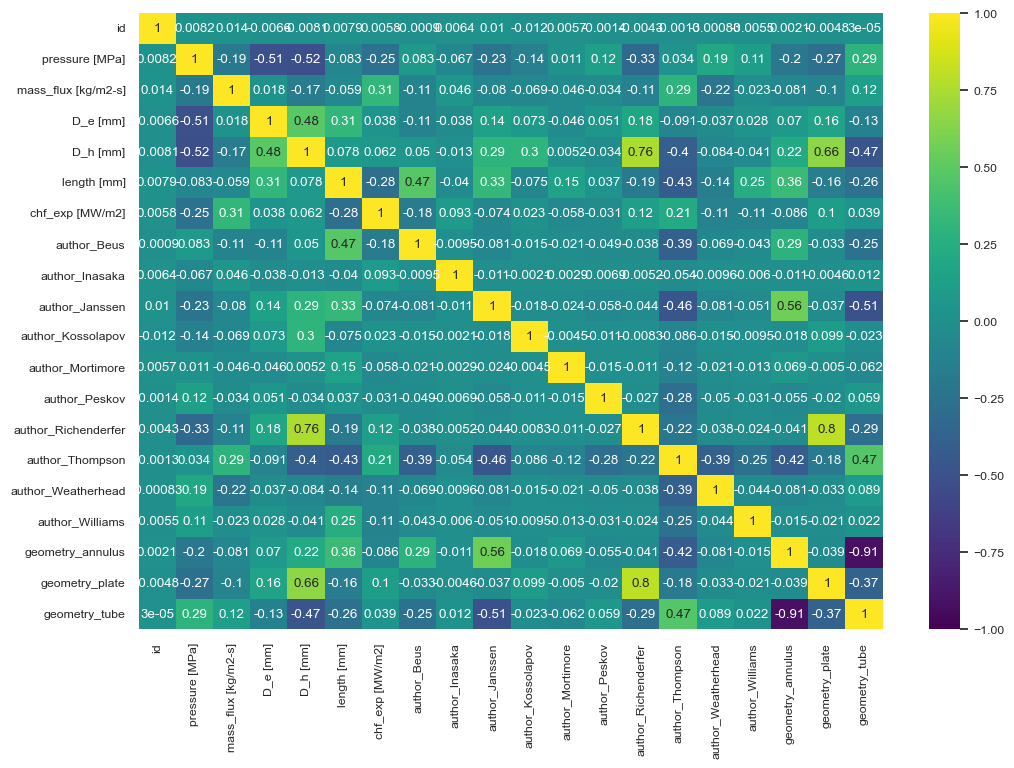

In [29]:
plt.figure(figsize=(12, 8))

# Ajustar el tamaño de las celdas
sns.set(font_scale=0.8)

# Crear el mapa de calor
sns.heatmap(X.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="viridis")

# Mostrar el mapa de calor
plt.show()

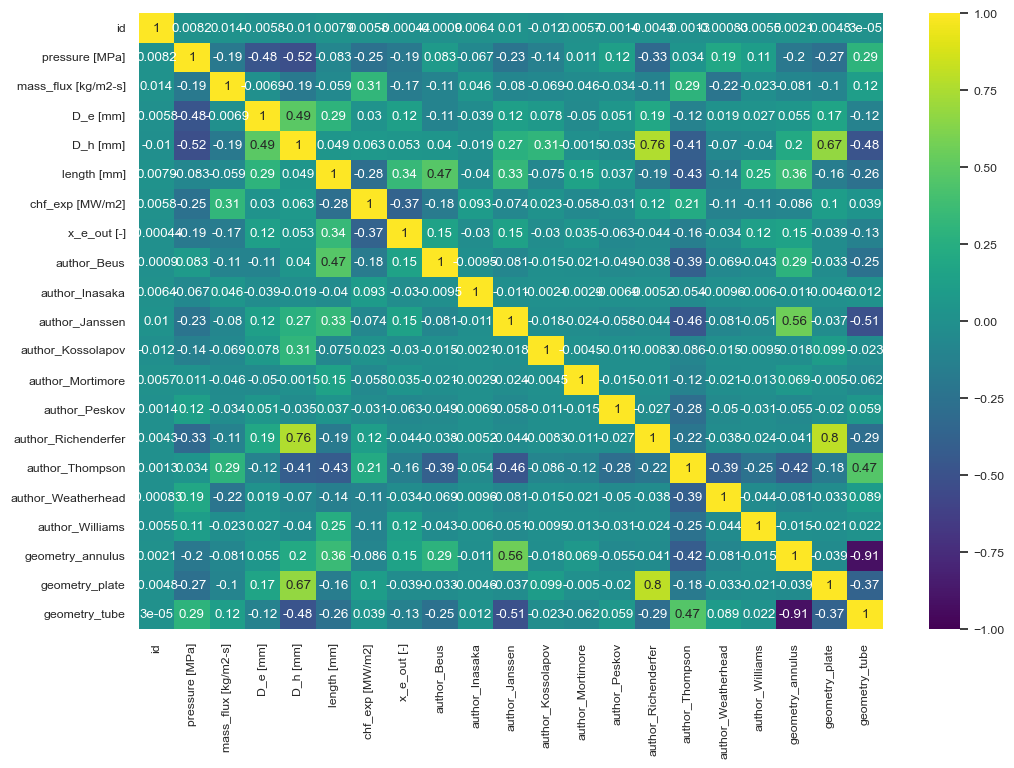

In [116]:
plt.figure(figsize=(12, 8))

# Ajustar el tamaño de las celdas
sns.set(font_scale=0.8)

# Crear el mapa de calor
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="viridis")

# Mostrar el mapa de calor
plt.show()

In [30]:
df_aut = X.groupby(['D_e [mm]', 'D_h [mm]'])['pressure [MPa]'].value_counts().sort_values(ascending=False)

pd.set_option('display.max_rows', None)  # Mostrar todas las filas
print(df_aut)

D_e [mm]  D_h [mm]  pressure [MPa]
7.7       7.7       13.7900           2010
4.7       4.7       13.7900           1585
7.8       7.8       13.7900            889
10.3      10.3      6.8900             864
                    10.3400            704
23.6      23.6      6.8900             435
5.6       15.2      13.7900            403
1.9       1.9       15.5100            384
10.8      10.8      6.8600             356
1.9       1.9       13.7900            350
                    17.2400            340
                    12.0700            340
5.6       15.2      15.5100            333
1.9       1.9       18.9600            319
10.3      10.3      3.4500             297
5.6       15.2      11.0300            295
10.8      10.8      6.8900             289
12.7      42.3      6.8900             248
9.5       9.5       13.7900            244
10.8      10.8      6.7900             230
5.7       5.7       13.7900            227
12.7      38.1      6.8900             220
10.0      10.0     

In [27]:
# Crear el DataFrame con los valores proporcionados
data = {'D_e [mm]': [7.7, 10.3, 10.3, 1.9, 10.8, 10.8, 1.9, 1.9, 1.9, 5.6, 10.3, 10.0],
        'D_h [mm]': [7.7, 10.3, 10.3, 1.9, 10.8, 10.8, 1.9, 1.9, 1.9, 15.2, 10.3, 10.0],
        'pressure [MPa]': [13.7900, 6.8900, 10.3400, 15.5100, 6.8600, 6.7900, 12.0700, 17.2400, 18.9600, 11.0300, 3.4500, 12.0000]}

# Crear un diccionario con los valores de 'D_e [mm]' y 'D_h [mm]' correspondientes
de_dict = {13.7900: (7.7, 7.7), 6.8900: (10.3, 10.3), 10.3400: (10.3, 10.3), 15.5100: (1.9, 1.9), 17.2400: (1.9, 1.9),
           6.8600: (10.8, 10.8), 11.0300: (5.6, 15.2), 6.7900: (10.8, 10.8), 12.0700: (1.9, 1.9),
           12.0000: (10.0, 10.0), 3.4500: (10.3, 10.3), 18.9600: (1.9, 1.9)}

# Iterar sobre las filas del DataFrame para imputar los valores nulos en 'D_h [mm]' y 'D_e [mm]'
for index, row in X.iterrows():
    de = row['D_e [mm]']
    dh = row['D_h [mm]']
    length = row['pressure [MPa]']
    
    # Verificar si el valor en 'D_h [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(dh) and de in de_dict:
        X.at[index, 'D_h [mm]'] = de_dict[de][1]
    
    # Verificar si el valor en 'D_e [mm]' es NaN y hay una correspondencia en el diccionario
    if pd.isnull(de) and dh in de_dict:
        X.at[index, 'D_e [mm]'] = de_dict[dh][0]
        
    # Verificar si el valor en 'length [mm]' tiene una correspondencia en el diccionario
    if length in de_dict:
        de, dh = de_dict[length]
        X.at[index, 'D_e [mm]'] = de
        X.at[index, 'D_h [mm]'] = dh

print(X)

       pressure [MPa]  mass_flux [kg/m2-s]  D_e [mm]  D_h [mm]  length [mm]  \
0                7.00               3770.0      10.8      10.8        432.0   
1                 NaN               6049.0      10.3      10.3        762.0   
2               13.79               2034.0       7.7       7.7        457.0   
3               13.79               3679.0       7.7       7.7       2134.0   
5               17.24               3648.0       1.9       1.9        696.0   
...               ...                  ...       ...       ...          ...   
31636           12.07                  NaN       1.9       1.9        152.0   
31638             NaN               3648.0       4.7       4.7        318.0   
31639             NaN               1736.0       7.8       7.8        591.0   
31641           18.27                658.0       3.0       3.0        150.0   
31643            6.89               7568.0      10.3      10.3       1930.0   

       chf_exp [MW/m2]  author_Beus  author_Inasaka

In [28]:
# Calcular la media de las columnas 'D_e [mm]' y 'D_h [mm]'
media_de = X['D_e [mm]'].mean()
media_dh = X['D_h [mm]'].mean()

# Rellenar los valores nulos con la media en las columnas 'D_e [mm]' y 'D_h [mm]'
X['D_e [mm]'].fillna(media_de, inplace=True)
X['D_h [mm]'].fillna(media_dh, inplace=True)

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21229 entries, 0 to 31643
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21229 non-null  int64  
 1   pressure [MPa]       18243 non-null  float64
 2   mass_flux [kg/m2-s]  18002 non-null  float64
 3   D_e [mm]             21229 non-null  float64
 4   D_h [mm]             21229 non-null  float64
 5   length [mm]          18151 non-null  float64
 6   chf_exp [MW/m2]      21229 non-null  float64
 7   author_Beus          21229 non-null  uint8  
 8   author_Inasaka       21229 non-null  uint8  
 9   author_Janssen       21229 non-null  uint8  
 10  author_Kossolapov    21229 non-null  uint8  
 11  author_Mortimore     21229 non-null  uint8  
 12  author_Peskov        21229 non-null  uint8  
 13  author_Richenderfer  21229 non-null  uint8  
 14  author_Thompson      21229 non-null  uint8  
 15  author_Weatherhead   21229 non-null 

In [34]:
df_aut = X.groupby(['D_e [mm]', 'D_h [mm]'])['pressure [MPa]'].value_counts().sort_values(ascending=False)

df_aut

D_e [mm]   D_h [mm]    pressure [MPa]
7.700000   7.700000    13.7900           6179
10.300000  10.300000   6.8900            3145
1.900000   1.900000    15.5100            743
10.300000  10.300000   10.3400            719
5.600000   15.200000   11.0300            598
10.300000  10.300000   3.4500             409
10.800000  10.800000   6.8600             405
1.900000   1.900000    12.0700            355
                       17.2400            348
                       18.9600            332
10.800000  10.800000   6.7900             248
10.000000  10.000000   12.0000            233
3.000000   3.000000    18.2700            200
15.000000  120.000000  0.1000             198
10.800000  10.800000   3.8600             197
9.500000   9.500000    15.1700            196
10.000000  10.000000   10.0000            167
10.800000  10.800000   6.8300             141
5.600000   15.200000   8.2700             129
10.800000  10.800000   6.7200             111
12.700000  42.300000   6.9200             

In [29]:
# Crear un diccionario con los valores de reemplazo basados en 'D_e [mm]' y 'D_h [mm]'
valores_reemplazo = {
    (7.7, 7.7): 13.79,
    (10.3, 10.3): 6.89,
    (1.9, 1.9): 15.51,
    (5.6, 15.2): 11.03,
    (10.8, 10.8): 6.86,
    (3.0, 3.0): 18.27,
    (15.0, 120.0): 0.1,
    (9.5, 9.5): 15.17,
    (12.7, 42.3): 6.92,
    (1.0, 1.0): 0.1,
    (11.5, 11.5): 11.0
}

# Rellenar los valores nulos en 'pressure [MPa]' basados en 'D_e [mm]' y 'D_h [mm]'
X['pressure [MPa]'] = X.apply(lambda row: valores_reemplazo[(row['D_e [mm]'], row['D_h [mm]'])]
                                if pd.isnull(row['pressure [MPa]']) and (row['D_e [mm]'], row['D_h [mm]']) in valores_reemplazo else row['pressure [MPa]'], axis=1)

In [30]:
# Calcular la media de las columnas 'D_e [mm]' y 'D_h [mm]'
media_do = X['pressure [MPa]'].mean()

# Rellenar los valores nulos con la media en las columnas 'D_e [mm]' y 'D_h [mm]'
X['pressure [MPa]'].fillna(media_do, inplace=True)

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21229 entries, 0 to 31643
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   21229 non-null  int64  
 1   pressure [MPa]       21229 non-null  float64
 2   mass_flux [kg/m2-s]  18002 non-null  float64
 3   D_e [mm]             21229 non-null  float64
 4   D_h [mm]             21229 non-null  float64
 5   length [mm]          18151 non-null  float64
 6   chf_exp [MW/m2]      21229 non-null  float64
 7   author_Beus          21229 non-null  uint8  
 8   author_Inasaka       21229 non-null  uint8  
 9   author_Janssen       21229 non-null  uint8  
 10  author_Kossolapov    21229 non-null  uint8  
 11  author_Mortimore     21229 non-null  uint8  
 12  author_Peskov        21229 non-null  uint8  
 13  author_Richenderfer  21229 non-null  uint8  
 14  author_Thompson      21229 non-null  uint8  
 15  author_Weatherhead   21229 non-null 

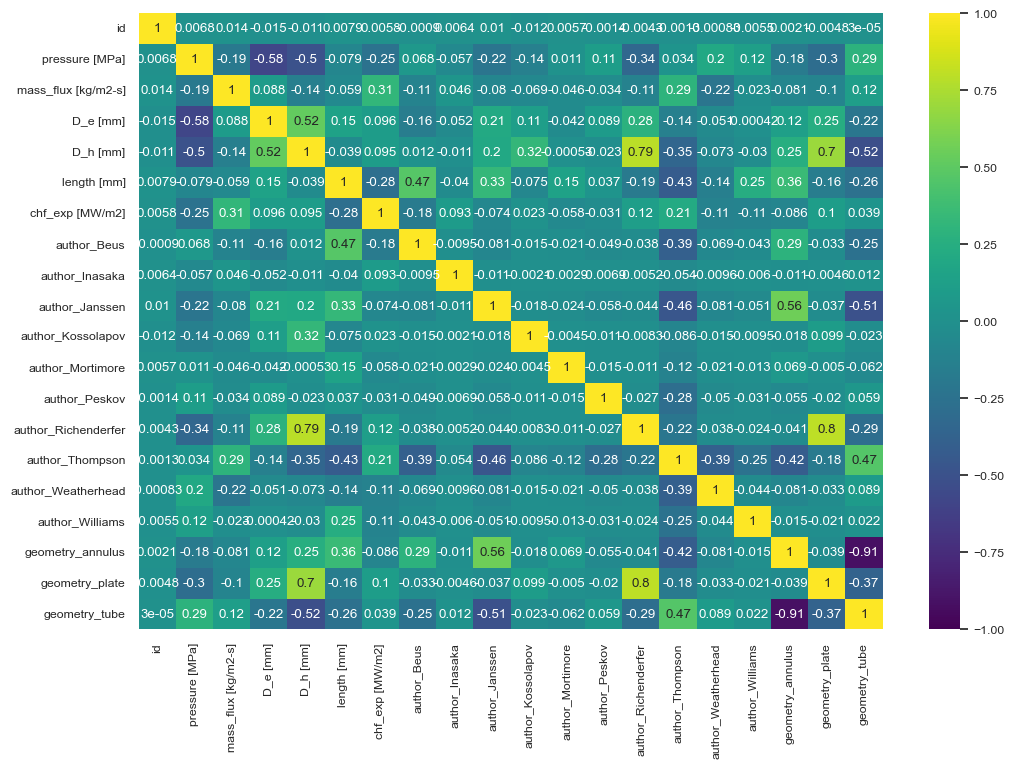

In [38]:
plt.figure(figsize=(12, 8))

# Ajustar el tamaño de las celdas
sns.set(font_scale=0.8)

# Crear el mapa de calor
sns.heatmap(X.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="viridis")

# Mostrar el mapa de calor
plt.show()

In [14]:
# Separar las características (X) y la columna objetivo (y)
X_nuevos_datos = nuevos_datos.drop(columns=["x_e_out [-]"])
y_nuevos_datos = nuevos_datos["x_e_out [-]"]

In [15]:
X.rename(columns={'pressure [MPa]': 'pressure', 'mass_flux [kg/m2-s]': 'mass_flux', 
                    'D_e [mm]': 'D_e', 'D_h [mm]': 'D_h', 'length [mm]': 'length'
                    , 'chf_exp [MW/m2]': 'chf_exp'}, inplace=True)

y.name = 'x_e_out'

In [16]:
X_nuevos_datos.rename(columns={'pressure [MPa]': 'pressure', 'mass_flux [kg/m2-s]': 'mass_flux', 
                    'D_e [mm]': 'D_e', 'D_h [mm]': 'D_h', 'length [mm]': 'length'
                    , 'chf_exp [MW/m2]': 'chf_exp'}, inplace=True)


,pressure,mass_flux,D_e,D_h,length,chf_exp,author_Beus,author_Inasaka,author_Janssen,author_Kossolapov,author_Mortimore,author_Peskov,author_Richenderfer,author_Thompson,author_Weatherhead,author_Williams,geometry_annulus,geometry_plate,geometry_tube
4,13.79,686.0,11.1,11.1,457.0,2.8,0,0,0,0,0,0,0,1,0,0,0,0,1
7,18.00,750.0,10.0,10.0,1650.0,2.2,0,0,0,0,0,1,0,0,0,0,0,0,1
10,NaN,NaN,1.9,1.9,152.0,3.2,0,0,0,0,0,0,0,1,0,0,0,0,1
12,6.89,7500.0,12.8,12.8,1930.0,4.8,0,0,0,0,0,0,0,1,0,0,0,0,1
23,15.51,1355.0,5.6,15.2,2134.0,2.1,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31633,11.03,NaN,11.5,11.5,NaN,2.0,0,0,0,0,0,0,0,1,0,0,0,0,1
31634,1.01,2000.0,15.0,120.0,10.0,6.2,0,0,0,0,0,0,1,0,0,0,0,1,0
31637,13.79,688.0,11.1,11.1,457.0,2.3,0,0,0,0,0,0,0,0,1,0,0,0,1
31640,13.79,NaN,4.7,4.7,NaN,3.9,0,0,0,0,0,0,0,1,0,0,0,0,1


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Definir el pipeline
imputation_columns = ['pressure', 'mass_flux', 'D_e', 'D_h', 'length', 'chf_exp',
                      'author_Beus', 'author_Inasaka', 'author_Janssen', 'author_Kossolapov',
                      'author_Mortimore', 'author_Peskov', 'author_Richenderfer',
                      'author_Thompson', 'author_Weatherhead', 'author_Williams',
                      'geometry_annulus', 'geometry_plate', 'geometry_tube']

# Definir el pipeline
estimators = [
    ('rf', RandomForestRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=10)),
    ('xgb', XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6)),
    ('gb', GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)),
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('ada', AdaBoostRegressor(n_estimators=100, learning_rate=0.1))
]

pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=20, random_state=42)),
    ('scaler', StandardScaler()),
    ('stacking', StackingRegressor(estimators=estimators))
], verbose=True)

# Entrenar el pipeline
# Ajustar el pipeline al conjunto de entrenamiento
pipeline.fit(X_train[imputation_columns], y_train)

# Realizar predicciones
predictions = pipeline.predict(X_test[imputation_columns])

# Calcular el RMSE
mse = np.mean((predictions - y_test)**2)
rmse = np.sqrt(mse)

print("RMSE en el conjunto de prueba:", rmse)

[Pipeline] ........... (step 1 of 3) Processing imputer, total=   2.4s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] .......... (step 3 of 3) Processing stacking, total= 1.1min
RMSE en el conjunto de prueba: 0.07423269600864034


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import StackingRegressor

# Definir el pipeline
imputation_columns = ['pressure', 'mass_flux', 'D_e', 'D_h', 'length', 'chf_exp',
                      'author_Beus', 'author_Inasaka', 'author_Janssen', 'author_Kossolapov',
                      'author_Mortimore', 'author_Peskov', 'author_Richenderfer',
                      'author_Thompson', 'author_Weatherhead', 'author_Williams',
                      'geometry_annulus', 'geometry_plate', 'geometry_tube']

# Definir el pipeline
estimators = [
    ('rf', RandomForestRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=10)),
    ('xgb', XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6))
]

pipeline = Pipeline([
    ('imputer', KNNImputer(add_indicator=False, missing_values=np.nan, n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('stacking', StackingRegressor(estimators=estimators))
], verbose=True)

# Entrenar el pipeline
# Ajustar el pipeline al conjunto de entrenamiento
pipeline.fit(X_train[imputation_columns], y_train)

# Realizar predicciones
predictions = pipeline.predict(X_test)

# Calcular el RMSE
mse = np.mean((predictions - y_test)**2)
rmse = np.sqrt(mse)

print("RMSE en el conjunto de prueba:", rmse)

[Pipeline] ........... (step 1 of 3) Processing imputer, total=  15.5s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] .......... (step 3 of 3) Processing stacking, total=  40.8s
RMSE en el conjunto de prueba: 0.07405877231847635


In [62]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import StackingRegressor
import numpy as np

# Definir el pipeline
imputation_columns = ['pressure', 'mass_flux', 'D_e', 'D_h', 'length', 'chf_exp',
                      'author_Beus', 'author_Inasaka', 'author_Janssen', 'author_Kossolapov',
                      'author_Mortimore', 'author_Peskov', 'author_Richenderfer',
                      'author_Thompson', 'author_Weatherhead', 'author_Williams',
                      'geometry_annulus', 'geometry_plate', 'geometry_tube']

# Definir los estimadores del stacking
estimators = [
    ('rf', RandomForestRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=10)),
    ('xgb', XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=1000, subsample=0.6)),
    ('gb', GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1)), 
]

# Definir el pipeline
pipeline = Pipeline([
    ('imputer', KNNImputer(add_indicator=False, missing_values=np.nan, n_neighbors=5)),
    ('scaler', StandardScaler()),
    ('stacking', StackingRegressor(estimators=estimators))
], verbose=True)

# Entrenar el pipeline
# Ajustar el pipeline al conjunto de entrenamiento
pipeline.fit(X_train[imputation_columns], y_train)

# Realizar predicciones
predictions = pipeline.predict(X_test)

# Calcular el RMSE
mse = np.mean((predictions - y_test)**2)
rmse = np.sqrt(mse)

print("RMSE en el conjunto de prueba:", rmse)

[Pipeline] ........... (step 1 of 3) Processing imputer, total=  21.1s
[Pipeline] ............ (step 2 of 3) Processing scaler, total=   0.0s
[Pipeline] .......... (step 3 of 3) Processing stacking, total= 1.3min
RMSE en el conjunto de prueba: 0.07402706230200776


In [34]:
X_nuevos_datos = X_nuevos_datos.drop("id", axis=1)

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
import pandas as pd

# Definir la transformación de características con el imputador KNN
transformer = ColumnTransformer(
    transformers=[('imputer', KNNImputer(n_neighbors=5), imputation_columns)],
    remainder='passthrough'
)

# Imputar los valores nulos en X_nuevos_datos utilizando el pipeline
X_nuevos_datos_imputed = transformer.fit_transform(X_nuevos_datos)

# Convertir el resultado a DataFrame
X_nuevos_datos_imputed = pd.DataFrame(X_nuevos_datos_imputed, columns=X_nuevos_datos.columns)

# Realizar la predicción en los nuevos datos imputados
predictions = pipeline.predict(X_nuevos_datos_imputed)

# Imprimir las predicciones
print("Predicciones en los nuevos datos:")
print(predictions)



Predicciones en los nuevos datos:
[ 0.01505239 -0.08289251 -0.04929384 ...  0.02760645 -0.0566464
  0.00366562]


In [64]:
# Combinar las predicciones con los datos originales
nuevos_datos["x_e_out [-]"] = predictions

# Los datos ahora tienen las predicciones en la columna objetivo (y)

# Guardar los datos en un archivo para la competición de Kaggle
nuevos_datos.to_csv("nuevos_datos_con_predicciones1.csv", index=False)

In [65]:
# # Leer el archivo CSV
prueba1 = pd.read_csv("nuevos_datos_con_predicciones1.csv")

# Mantener solo las columnas "id" y "x_e_out [mm]"
columnas_deseadas = ["id", "x_e_out [-]"]
prueba1 = prueba1[columnas_deseadas]

# Guardar el DataFrame resultante en un nuevo archivo CSV
prueba1.to_csv("nuevos_datos_con_predicciones_filtrado9.csv", index=False)

## GRADIENT BOOSTING

In [61]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Definir el imputador KNN
imputer = KNNImputer()

# Definir el modelo Gradient Boosting
model = GradientBoostingRegressor()

# Definir la malla de hiperparámetros a probar
param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7]
}

# Definir el pipeline con el imputador y el modelo
pipeline = Pipeline([
    ('imputer', imputer),
    ('model', model)
])

# Realizar la búsqueda en la malla de hiperparámetros
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Entrenar el mejor modelo con los mejores hiperparámetros
best_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calcular el RMSE
mse = np.mean((predictions - y_test)**2)
rmse = np.sqrt(mse)

print("Mejores hiperparámetros:", best_params)
print("RMSE en el conjunto de prueba:", rmse)

Mejores hiperparámetros: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}
RMSE en el conjunto de prueba: 0.0748582453276571


In [59]:
X_train

,pressure,mass_flux,D_e,D_h,length,chf_exp,author_Beus,author_Inasaka,author_Janssen,author_Kossolapov,author_Mortimore,author_Peskov,author_Richenderfer,author_Thompson,author_Weatherhead,author_Williams,geometry_annulus,geometry_plate,geometry_tube
4147,13.79,2034.0,7.7,7.7,457.0,3.7,0,0,0,0,0,0,0,0,1,0,0,0,1
23341,6.89,6157.0,NaN,3.6,76.0,6.6,0,0,0,0,0,0,0,1,0,0,0,0,1
5858,6.89,4286.0,10.3,10.3,794.0,5.9,0,0,0,0,0,0,0,1,0,0,0,0,1
7624,6.89,5859.0,10.3,10.3,794.0,3.6,0,0,0,0,0,0,0,1,0,0,0,0,1
3039,6.89,5479.0,23.6,NaN,1972.0,4.9,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16916,13.79,1316.0,4.7,4.7,318.0,3.9,0,0,0,0,0,0,0,1,0,0,0,0,1
17899,12.00,NaN,10.0,10.0,1000.0,3.1,0,0,0,0,0,1,0,0,0,0,0,0,1
8029,10.34,7432.0,10.3,10.3,762.0,2.6,0,0,0,0,0,0,0,1,0,0,0,0,1
1288,13.79,963.0,7.7,7.7,457.0,13.3,0,0,0,0,0,0,0,0,1,0,0,0,1


In [33]:
from sklearn.impute import KNNImputer
import pandas as pd

In [34]:
# Crear un objeto KNNImputer
imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el valor de K según tus necesidades

# Aplicar la imputación en el conjunto de entrenamiento
X_train_imputed = imputer.fit_transform(X_train)

# El resultado de fit_transform es un numpy array, así que puedes convertirlo de nuevo a un DataFrame si es necesario
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Aplicar la imputación en el conjunto de prueba (usando el mismo imputador ajustado en el conjunto de entrenamiento)
X_test_imputed = imputer.transform(X_test)

# El resultado también es un numpy array, que se puede convertir a DataFrame si es necesario
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [43]:
# # Crear el objeto de regresión lineal
# regression_model = LinearRegression()

# # Entrenar el modelo de regresión lineal
# regression_model.fit(X_train_imputed, y_train)

# # Realizar predicciones en el conjunto de prueba
# y_pred = regression_model.predict(X_test_imputed)

# # Evaluar el rendimiento del modelo
# from sklearn.metrics import mean_squared_error, r2_score

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error (MSE): ", mse)
# print("R-squared (R2) Score: ", r2)

# from math import sqrt

# # Calcular el RMSE
# rmse = sqrt(mse)

# print("Root Mean Squared Error (RMSE): ", rmse)

In [35]:
#Separar las características (X) y la columna objetivo (y)
X_nuevos_datos = nuevos_datos.drop(columns=["x_e_out [-]"])
y_nuevos_datos = nuevos_datos["x_e_out [-]"]


# Imputar los valores nulos en las características (X)
imputer = KNNImputer(n_neighbors=5)
X_nuevos_datos_imputed = imputer.fit_transform(X_nuevos_datos)

# Convertir el resultado a DataFrame
X_nuevos_datos_imputed = pd.DataFrame(X_nuevos_datos_imputed, columns=X_nuevos_datos.columns)

# # Crear el objeto de regresión lineal
# regression_model = LinearRegression()

# # Entrenar el modelo de regresión lineal
# regression_model.fit(X_train_imputed, y_train)

# Realizar predicciones en la columna objetivo (y) para los datos imputados
#y_pred = regression_model.predict(X_nuevos_datos_imputed)

# Combinar las predicciones con los datos originales
#nuevos_datos["x_e_out [-]"] = y_pred

# Los datos ahora tienen las predicciones en la columna objetivo (y)

# Guardar los datos en un archivo para la competición de Kaggle
#nuevos_datos.to_csv("nuevos_datos_con_predicciones1.csv", index=False)

In [45]:
#prueba = pd.read_csv("nuevos_datos_con_predicciones.csv")


In [46]:
# # Leer el archivo CSV
# prueba = pd.read_csv("nuevos_datos_con_predicciones.csv")

# # Mantener solo las columnas "id" y "x_e_out [mm]"
# columnas_deseadas = ["id", "x_e_out [-]"]
# prueba = prueba[columnas_deseadas]

# # Guardar el DataFrame resultante en un nuevo archivo CSV
# prueba.to_csv("nuevos_datos_con_predicciones_filtrado.csv", index=False)

In [66]:
modelo = RandomForestRegressor(max_depth= 14, min_samples_leaf= 5, min_samples_split= 10, n_estimators= 100)
modelo.fit(X_train_imputed, y_train)

RandomForestRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=10)

In [67]:
y_pred = modelo.predict(X_test_imputed)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2)
from math import sqrt

#Calcular el RMSE

rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)


Mean Squared Error (MSE):  0.0057560533416444095
R-squared (R2) Score:  0.43332511654558803
Root Mean Squared Error (RMSE):  0.07586865849377072


In [50]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Crear el modelo de Random Forest
model = RandomForestRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_imputed, y_train)

# Obtener los resultados de la búsqueda
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Entrenar el modelo con los mejores hiperparámetros encontrados
best_model = RandomForestRegressor(random_state=42, **best_params)
best_model.fit(X_train_imputed, y_train)

# Evaluar el modelo en los datos de prueba
y_pred = best_model.predict(X_test_imputed)

rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

print("Mejores hiperparámetros encontrados:", best_params)
print("RMSE en datos de prueba:", rmse)

Root Mean Squared Error (RMSE):  0.07905385293712497
Mejores hiperparámetros encontrados: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
RMSE en datos de prueba: 0.07905385293712497


In [76]:
#Separar las características (X) y la columna objetivo (y)
X_nuevos_datos = nuevos_datos.drop(columns=["x_e_out [-]"])
y_nuevos_datos = nuevos_datos["x_e_out [-]"]

# Imputar los valores nulos en las características (X)
imputer = KNNImputer(n_neighbors=5)
X_nuevos_datos_imputed = imputer.fit_transform(X_nuevos_datos)

# Convertir el resultado a DataFrame
X_nuevos_datos_imputed = pd.DataFrame(X_nuevos_datos_imputed, columns=X_nuevos_datos.columns)

# # Crear el objeto de regresión lineal
# regression_model = LinearRegression()

# # Entrenar el modelo de regresión lineal
# regression_model.fit(X_train_imputed, y_train)

# Realizar predicciones en la columna objetivo (y) para los datos imputados
y_pred = modelo.predict(X_nuevos_datos_imputed)

# Combinar las predicciones con los datos originales
nuevos_datos["x_e_out [-]"] = y_pred

# Los datos ahora tienen las predicciones en la columna objetivo (y)

# Guardar los datos en un archivo para la competición de Kaggle
nuevos_datos.to_csv("nuevos_datos_con_predicciones1.csv", index=False)

In [77]:
# # Leer el archivo CSV
prueba1 = pd.read_csv("nuevos_datos_con_predicciones1.csv")

# Mantener solo las columnas "id" y "x_e_out [mm]"
columnas_deseadas = ["id", "x_e_out [-]"]
prueba1 = prueba1[columnas_deseadas]

# Guardar el DataFrame resultante en un nuevo archivo CSV
prueba1.to_csv("nuevos_datos_con_predicciones_filtrado1.csv", index=False)

## XGBOSST

In [37]:
import xgboost as xgb


In [92]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Crear el modelo XGBoost
model = xgb.XGBRegressor(random_state=42)

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_imputed, y_train)

# Obtener los resultados de la búsqueda
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Entrenar el modelo con los mejores hiperparámetros encontrados
best_model = xgb.XGBRegressor(random_state=42, **best_params)
best_model.fit(X_train_imputed, y_train)

# Evaluar el modelo en los datos de prueba
y_pred = best_model.predict(X_test_imputed)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mejores hiperparámetros encontrados:", best_params)
print("RMSE en datos de prueba:", rmse)

Mejores hiperparámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.8}
RMSE en datos de prueba: 0.07519475968422061


In [64]:
# Entrenar el modelo con el mejor valor de max_depth
best_model = xgb.XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.01, max_depth = 5, n_estimators=1000, subsample= 0.6)
best_model.fit(X_train_imputed, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test_imputed)

In [65]:
# Evaluar el rendimiento del modelo
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2)

from math import sqrt

# Calcular el RMSE
rmse = sqrt(mse)

print("Root Mean Squared Error (RMSE): ", rmse)

Mean Squared Error (MSE):  0.005559510917400749
R-squared (R2) Score:  0.45267442565402405
Root Mean Squared Error (RMSE):  0.07456212790284857


In [97]:
# Realizar predicciones en la columna objetivo (y) para los datos imputados
y_pred1 = best_model.predict(X_nuevos_datos_imputed)

# Combinar las predicciones con los datos originales
nuevos_datos["x_e_out [-]"] = y_pred1

# Los datos ahora tienen las predicciones en la columna objetivo (y)

# Guardar los datos en un archivo para la competición de Kaggle
nuevos_datos.to_csv("nuevos_datos_con_predicciones2.csv", index=False)

In [99]:
# # Leer el archivo CSV
prueba2 = pd.read_csv("nuevos_datos_con_predicciones2.csv")

# Mantener solo las columnas "id" y "x_e_out [mm]"
columnas_deseadas = ["id", "x_e_out [-]"]
prueba2 = prueba2[columnas_deseadas]

# Guardar el DataFrame resultante en un nuevo archivo CSV
prueba2.to_csv("nuevos_datos_con_predicciones_filtrado2.csv", index=False)

### EMSAMBLE

In [96]:
from sklearn.ensemble import VotingRegressor
voting_reg1 = VotingRegressor([('rf', modelo), ('XG', best_model)], weights=[0.3551628939023222, 0.6448371060976779])
voting_reg1.fit(X_train_imputed, y_train)

VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=14,
                                                   min_samples_leaf=5,
                                                   min_samples_split=10)),
                            ('XG',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.5,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None...
                                          interaction_constraints=None,
                                          learning_rate=0.01, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...))],
                weights=[0.3551628939023222, 0.6448371060976779])

In [95]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingRegressor

# Define la función objetivo para optimizar los pesos del ensamblaje
def objective(trial):
    # Define los límites de los pesos a probar
    rf_weight = trial.suggest_uniform('rf_weight', 0, 1)
    xg_weight = 1 - rf_weight
    
    # Crea el ensamblaje con los pesos sugeridos
    ensamble = VotingRegressor([('rf', modelo), ('XG', best_model)], weights=[rf_weight, xg_weight])
    
    # Realiza la validación cruzada para evaluar el rendimiento con los pesos sugeridos
    scores = -cross_val_score(ensamble, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_score = scores.mean()
    
    return mean_score

# Crea un estudio Optuna y realiza la optimización
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Obtiene los mejores pesos encontrados
best_rf_weight = study.best_params['rf_weight']
best_xg_weight = 1 - best_rf_weight

# Crea el ensamblaje con los mejores pesos
best_ensamble = VotingRegressor([('rf', modelo), ('XG', best_model)], weights=[best_rf_weight, best_xg_weight])

# Entrena el ensamblaje en todo el conjunto de entrenamiento
best_ensamble.fit(X_train_imputed, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = best_ensamble.predict(X_test_imputed)

# Calcula el RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Imprime los mejores pesos y el RMSE obtenido
print("Mejores pesos: RF =", best_rf_weight, "XG =", best_xg_weight)
print("RMSE:", rmse)

[I 2023-05-23 10:05:50,196] A new study created in memory with name: no-name-37ae4d49-b965-4f25-bde5-917e9010ba57
C:\Users\ismme\AppData\Local\Temp\ipykernel_2836\3353760078.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  rf_weight = trial.suggest_uniform('rf_weight', 0, 1)
[I 2023-05-23 10:06:26,737] Trial 0 finished with value: 0.005583798344919112 and parameters: {'rf_weight': 0.3251200490063241}. Best is trial 0 with value: 0.005583798344919112.
C:\Users\ismme\AppData\Local\Temp\ipykernel_2836\3353760078.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  rf_weight = trial.suggest_uniform('rf_weight', 0, 1)
[I 2023-05-23 10:06:56,722] Trial 1

Mejores pesos: RF = 0.3551628939023222 XG = 0.6448371060976779
RMSE: 0.07457660467274467


In [93]:
from sklearn.model_selection import cross_val_score

# Realiza la validación cruzada
scores = cross_val_score(voting_reg1, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcula el promedio de los puntajes (negativos) obtenidos en cada iteración de la validación cruzada
mean_score = -scores.mean()

# Imprime el puntaje medio obtenido
print("Puntaje medio (negativo) de la validación cruzada:", mean_score)

Puntaje medio (negativo) de la validación cruzada: 0.005588176627468128


In [97]:
ensamble1=voting_reg1.predict(X_test_imputed)


mse = mean_squared_error(y_test, ensamble1)
r2 = r2_score(y_test, ensamble1)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2)
from math import sqrt

#Calcular el RMSE

rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Mean Squared Error (MSE):  0.005558899695558238
R-squared (R2) Score:  0.45273459953460016
Root Mean Squared Error (RMSE):  0.07455802904824026


In [85]:
X_nuevos_datos_imputed = X_nuevos_datos_imputed.drop("id", axis=1)

In [91]:
# Realizar predicciones en la columna objetivo (y) para los datos imputados
y_pred2 = voting_reg1.predict(X_nuevos_datos_imputed)

# Combinar las predicciones con los datos originales
nuevos_datos["x_e_out [-]"] = y_pred2

# Los datos ahora tienen las predicciones en la columna objetivo (y)

# Guardar los datos en un archivo para la competición de Kaggle
nuevos_datos.to_csv("nuevos_datos_con_predicciones2.csv", index=False)

In [90]:
X_nuevos_datos_imputed.rename(columns={'pressure [MPa]': 'pressure', 'mass_flux [kg/m2-s]': 'mass_flux', 
                    'D_e [mm]': 'D_e', 'D_h [mm]': 'D_h', 'length [mm]': 'length'
                    , 'chf_exp [MW/m2]': 'chf_exp'}, inplace=True)

In [92]:
# # Leer el archivo CSV
prueba3 = pd.read_csv("nuevos_datos_con_predicciones2.csv")

# Mantener solo las columnas "id" y "x_e_out [mm]"
columnas_deseadas = ["id", "x_e_out [-]"]
prueba3 = prueba3[columnas_deseadas]

# Guardar el DataFrame resultante en un nuevo archivo CSV
prueba3.to_csv("nuevos_datos_con_predicciones_filtrado7.csv", index=False)

### DEEP LEARNING


In [131]:
from keras.models import Sequential
from keras.layers import Dense

# Crea el modelo secuencial
model = Sequential()
input_dim = 19
# Añade las capas ocultas
model.add(Dense(64, activation='relu', input_shape=(input_dim,)))


# Añade la capa de salida
model.add(Dense(1, activation='linear'))

# Imprime un resumen del modelo
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1280      
                                                                 
 dense_16 (Dense)            (None, 1)                 65        
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [132]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [133]:
history = model.fit(X_train_imputed, y_train, epochs=100, batch_size=32, validation_data=(X_test_imputed, y_test))

Epoch 1/100
531/531 [==============================] - 4s 7ms/step - loss: 11109.1279 - val_loss: 2.7580
Epoch 2/100
531/531 [==============================] - 1s 1ms/step - loss: 1.6067 - val_loss: 1.5573
Epoch 3/100
531/531 [==============================] - 1s 1ms/step - loss: 0.8567 - val_loss: 0.8479
Epoch 4/100
531/531 [==============================] - 1s 2ms/step - loss: 0.5439 - val_loss: 0.5865
Epoch 5/100
531/531 [==============================] - 1s 2ms/step - loss: 0.3662 - val_loss: 0.3336
Epoch 6/100
531/531 [==============================] - 1s 2ms/step - loss: 0.2421 - val_loss: 0.2326
Epoch 7/100
531/531 [==============================] - 1s 2ms/step - loss: 0.2002 - val_loss: 0.1671
Epoch 8/100
531/531 [==============================] - 1s 2ms/step - loss: 0.1524 - val_loss: 0.1292
Epoch 9/100
531/531 [==============================] - 1s 2ms/step - loss: 0.1387 - val_loss: 0.1426
Epoch 10/100
531/531 [==============================] - 1s 2ms/step - loss: 0.1476 - va

In [134]:
loss = model.evaluate(X_test_imputed, y_test)
print("Pérdida en el conjunto de prueba:", loss)

133/133 [==============================] - 0s 1ms/step - loss: 0.1073
Pérdida en el conjunto de prueba: 0.10729831457138062


In [135]:
predictions = model.predict(X_test_imputed).flatten()

# Convierte la serie y_test en un arreglo numpy y luego aplana el arreglo
y_test_arr = y_test.to_numpy().flatten()

# Calcula el RMSE
mse = np.mean((predictions - y_test_arr)**2)
rmse = np.sqrt(mse)

print("RMSE en el conjunto de prueba:", rmse)

133/133 [==============================] - 0s 1ms/step
RMSE en el conjunto de prueba: 0.32756659346544237


In [128]:
# Realiza las predicciones en los nuevos datos
predictions_nuevos_datos = model.predict(X_nuevos_datos_imputed)

# Imprime las predicciones
print(predictions_nuevos_datos)

326/326 [==============================] - 1s 2ms/step
[[-0.02253526]
 [-0.0133028 ]
 [-0.04995133]
 ...
 [ 0.00022661]
 [-0.06174165]
 [ 0.01984918]]


In [129]:
# Combinar las predicciones con los datos originales
nuevos_datos["x_e_out [-]"] = predictions_nuevos_datos

# Los datos ahora tienen las predicciones en la columna objetivo (y)

# Guardar los datos en un archivo para la competición de Kaggle
nuevos_datos.to_csv("nuevos_datos_con_predicciones2.csv", index=False)

In [130]:
# # Leer el archivo CSV
prueba3 = pd.read_csv("nuevos_datos_con_predicciones2.csv")

# Mantener solo las columnas "id" y "x_e_out [mm]"
columnas_deseadas = ["id", "x_e_out [-]"]
prueba3 = prueba3[columnas_deseadas]

# Guardar el DataFrame resultante en un nuevo archivo CSV
prueba3.to_csv("nuevos_datos_con_predicciones_filtrado8.csv", index=False)

### TODOS LOS MODELOS

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir el pipeline con XGBoost
xgb_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=20, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', XGBRegressor(colsample_bytree= 0.5, learning_rate= 0.01, max_depth = 5, n_estimators=1000, subsample= 0.6))
])

# Entrenar el pipeline de XGBoost
xgb_pipeline.fit(X_train, y_train)

# Realizar predicciones con XGBoost
xgb_predictions = xgb_pipeline.predict(X_test)

# Calcular el RMSE con XGBoost
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

print("RMSE con XGBoost:", xgb_rmse)

# Definir el pipeline con RandomForest
rf_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=20, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(max_depth=14, min_samples_leaf=5, min_samples_split=10))
])

# Entrenar el pipeline de RandomForest
rf_pipeline.fit(X_train, y_train)

# Realizar predicciones con RandomForest
rf_predictions = rf_pipeline.predict(X_test)

# Calcular el RMSE con RandomForest
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))

print("RMSE con RandomForest:", rf_rmse)

# Definir el pipeline con AdaBoost
ada_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=20, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', AdaBoostRegressor(n_estimators=100, learning_rate=0.1))
])

# Entrenar el pipeline de AdaBoost
ada_pipeline.fit(X_train, y_train)

# Realizar predicciones con AdaBoost
ada_predictions = ada_pipeline.predict(X_test)

# Calcular el RMSE con AdaBoost
ada_rmse = np.sqrt(mean_squared_error(y_test, ada_predictions))

print("RMSE con AdaBoost:", ada_rmse)

# Definir el pipeline con GradientBoosting
gb_pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=20, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1))
])

# Entrenar el pipeline de GradientBoosting
gb_pipeline.fit(X_train, y_train)

# Realizar predicciones con GradientBoosting
gb_predictions = gb_pipeline.predict(X_test)

# Calcular el RMSE con GradientBoosting
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))

print("RMSE con GradientBoosting:", gb_rmse)

RMSE con XGBoost: 0.07431248039969936
RMSE con RandomForest: 0.0759531770619544
RMSE con AdaBoost: 0.08991453947633972
RMSE con GradientBoosting: 0.07437564057085619


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir el pipeline con el modelo AdaBoostRegressor
pipeline = Pipeline([
    ('imputer', IterativeImputer(max_iter=20, random_state=42)),
    ('scaler', StandardScaler()),
    ('model', AdaBoostRegressor())
])

# Definir los hiperparámetros a ajustar
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 1.0]
}

# Realizar la búsqueda de hiperparámetros utilizando validación cruzada
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Obtener los resultados de la búsqueda
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Entrenar el modelo con los mejores hiperparámetros encontrados
best_model = AdaBoostRegressor(n_estimators=best_params['model__n_estimators'], learning_rate=best_params['model__learning_rate'])
best_model.fit(X_train, y_train)

# Realizar predicciones con el mejor modelo
predictions = best_model.predict(X_test)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("Mejores hiperparámetros encontrados:", best_params)
print("RMSE en datos de prueba:", rmse)

ValueError: Input X contains NaN.
AdaBoostRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [26]:
from sklearn.ensemble import VotingRegressor
voting_reg1 = VotingRegressor([('rf', rf_pipeline), ('XG', xgb_pipeline), 
                               ('GraBoosst', gb_pipeline)], 
                              weights=[2/10, 7/10, 1/10])
voting_reg1.fit(X_train, y_train)

VotingRegressor(estimators=[('rf',
                             Pipeline(steps=[('imputer',
                                              IterativeImputer(max_iter=20,
                                                               random_state=42)),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor(max_depth=14,
                                                                    min_samples_leaf=5,
                                                                    min_samples_split=10))])),
                            ('XG',
                             Pipeline(steps=[('imputer',
                                              IterativeImputer(max_iter=20,
                                                               random_state=42)),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegre...
                             Pipeline(steps=[('imputer',
                                              IterativeImputer(max_iter=20,
                                                               random_state=42)),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              GradientBoostingRegressor(max_depth=5))])),
                            ('AdaBoost',
                             Pipeline(steps=[('imputer',
                                              IterativeImputer(max_iter=20,
                                                               random_state=42)),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              AdaBoostRegressor(learning_rate=0.1,
                                                                n_estimators=100))]))],
                weights=[0.2, 0.5, 0.2, 0.1])

In [27]:
ensamble1=voting_reg1.predict(X_test)


mse = mean_squared_error(y_test, ensamble1)
r2 = r2_score(y_test, ensamble1)

print("Mean Squared Error (MSE): ", mse)
print("R-squared (R2) Score: ", r2)
from math import sqrt

#Calcular el RMSE

rmse = sqrt(mse)
print("Root Mean Squared Error (RMSE): ", rmse)

Mean Squared Error (MSE):  0.005572081203091336
R-squared (R2) Score:  0.45143689973897283
Root Mean Squared Error (RMSE):  0.07464637434659058


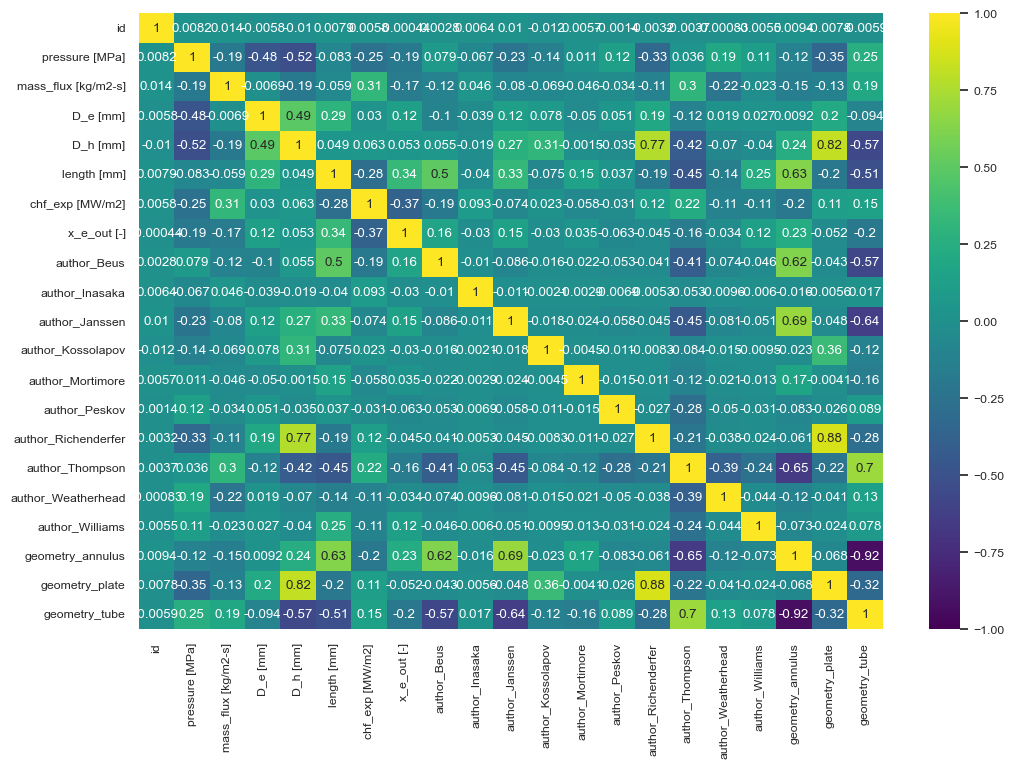

In [29]:
plt.figure(figsize=(12, 8))

# Ajustar el tamaño de las celdas
sns.set(font_scale=0.8)

# Crear el mapa de calor
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="viridis")

# Mostrar el mapa de calor
plt.show()